# Exercise 2

In [4]:
from agents import *
loc_A, loc_B = (0, 0), (1, 0)  # The two locations for the Vacuum world

## Question 1

Extend the vacuum agent so that it has 4 actions: Left,Right,Suck and DoNothing.


In [5]:
class TrivialVacuumEnvironment(Environment):
    """This environment has two locations, A and B. Each can be Dirty
    or Clean. The agent perceives its location and the location's
    status. This serves as an example of how to implement a simple
    Environment."""

    def __init__(self):
        super().__init__()
        self.status = {loc_A: random.choice(['Clean', 'Dirty']),
                       loc_B: random.choice(['Clean', 'Dirty'])}

    def thing_classes(self):
        return [Wall, Dirt, ReflexVacuumAgent, RandomVacuumAgent, TableDrivenVacuumAgent, ModelBasedVacuumAgent]

    def percept(self, agent):
        """Returns the agent's location, and the location status (Dirty/Clean)."""
        return agent.location, self.status[agent.location]

    def execute_action(self, agent, action):
        """Change agent's location and/or location's status; track performance.
        Score 10 for each dirt cleaned; -1 for each move."""
        if action == 'Right':
            agent.location = loc_B
            agent.performance -= 1
        elif action == 'Left':
            agent.location = loc_A
            agent.performance -= 1
        elif action == 'Suck':
            if self.status[agent.location] == 'Dirty':
                agent.performance += 10
            self.status[agent.location] = 'Clean'

    def default_location(self, thing):
        """Agents start in either location at random."""
        return random.choice([loc_A, loc_B])


In [6]:
def ReflexVacuumAgent():
    """
    [Figure 2.8]
    A reflex agent for the two-state vacuum environment.
    >>> agent = ReflexVacuumAgent()
    >>> environment = TrivialVacuumEnvironment()
    >>> environment.add_thing(agent)
    >>> environment.run()
    >>> environment.status == {(1,0):'Clean' , (0,0) : 'Clean'}
    True
    """

    def program(percept):
        location, status = percept
        if status == 'Dirty':
            return 'Suck'
        elif location == loc_A:
            return 'Right'
        elif location == loc_B:
            return 'Left'

    return Agent(program)

## Question 2

Explore search.py and look at least 4 search algorithms functions like breadth_first_graph_search,depth_first_graph_search etc. <br>

Compare all the algorithms for the map given below by showing which path the algorithm takes and its cost. <br>

Try to find which algorithm works the best.

Hint: Look at search.ipynb to know how the input parameters work for the algorithms.

<b>Start</b> city should be <b>Zerind</b> and the <b>destination</b> should be <b>Hirsova</b>.


In [44]:
from search import *
from notebook import *

In [45]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=90, Sibiu=160, Timisoara=130),
    Bucharest=dict(Urziceni=95, Pitesti=110, Giurgiu=100, Fagaras=230),
    Craiova=dict(Drobeta=135, Rimnicu=155, Pitesti=150),
    Drobeta=dict(Mehadia=85),
    Eforie=dict(Hirsova=95),
    Fagaras=dict(Sibiu=110),
    Hirsova=dict(Urziceni=105),
    Iasi=dict(Vaslui=100, Neamt=95),
    Lugoj=dict(Timisoara=120, Mehadia=80),
    Oradea=dict(Zerind=80, Sibiu=165),
    Pitesti=dict(Rimnicu=105),
    Rimnicu=dict(Sibiu=90),
    Urziceni=dict(Vaslui=155)
))

romania_map.locations = dict(
    Arad=(100, 500), Bucharest=(420, 340), Craiova=(270, 300),
    Drobeta=(180, 310), Eforie=(580, 300), Fagaras=(320, 460),
    Giurgiu=(390, 280), Hirsova=(550, 360), Iasi=(490, 520),
    Lugoj=(180, 390), Mehadia=(185, 350), Neamt=(425, 550),
    Oradea=(150, 585), Pitesti=(335, 380), Rimnicu=(250, 425),
    Sibiu=(225, 470), Timisoara=(110, 425), Urziceni=(475, 365),
    Vaslui=(525, 460), Zerind=(125, 545)
)


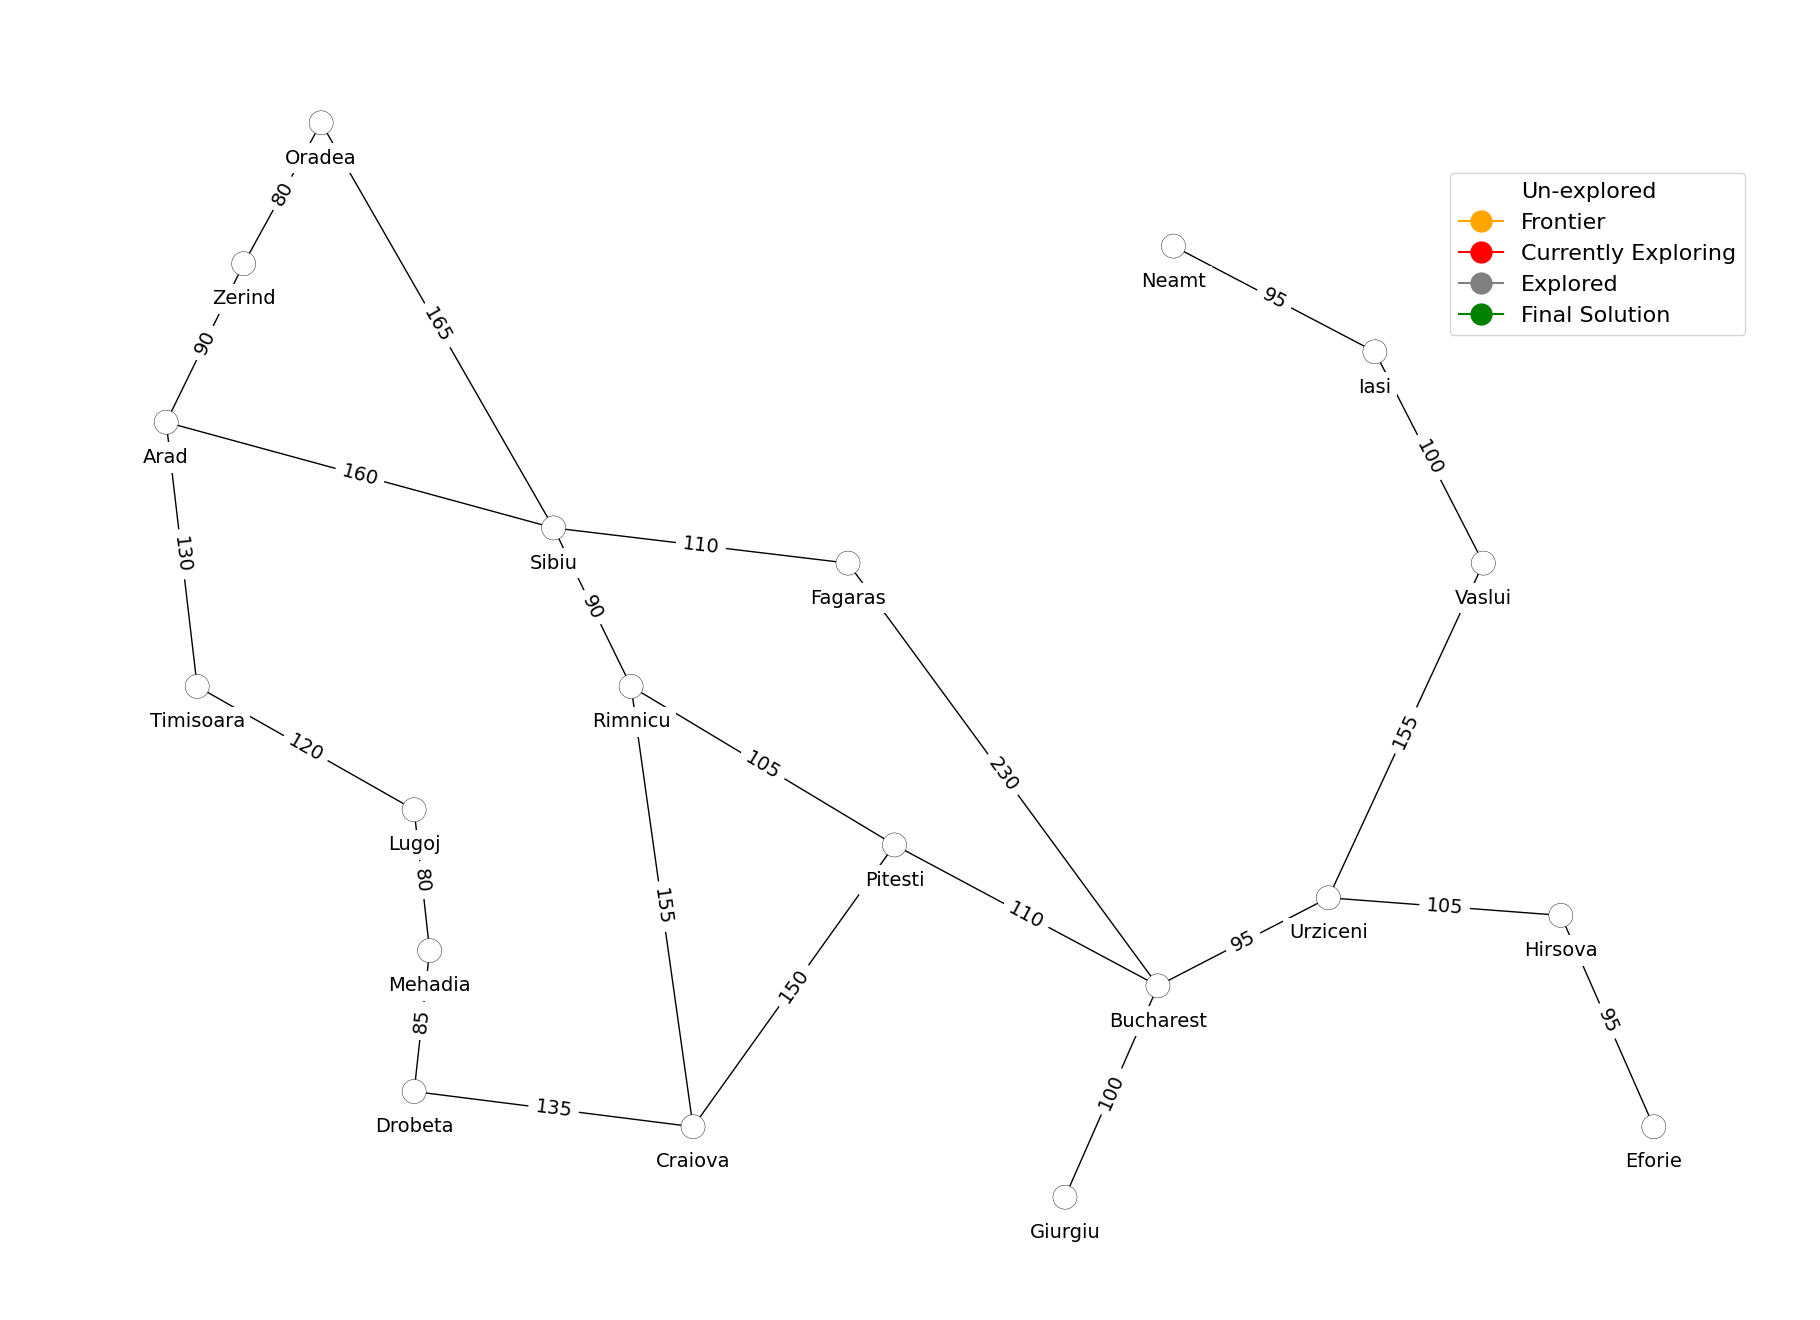

In [46]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }


show_map(romania_graph_data)

In [ ]:
#implement search algorithms here